## Car Price Prediction

In [4]:
import pandas as pd #for file
import numpy as np #for array
import matplotlib.pyplot as plt #for data visualization
import seaborn as sns #for data visualization

ModuleNotFoundError: No module named 'PIL'

In [2]:
df = pd.read_csv("car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
len(df["Car_Name"].unique())

98

In [7]:
df = df.iloc[:,1:]

In [8]:
df.isnull().sum()

Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
df['Current Year'] = 2021

In [10]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021


In [11]:
df['Age of car'] = df['Current Year']- df['Year']

In [12]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year,Age of car
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [13]:
df = df.drop(["Year" , "Current Year"] , axis = 1) #1 for rows and 0 for columns

In [14]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age of car
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [15]:
#categorical_variable = [i for i in df.columns if df[i].dtype == "O"]

In [16]:
categorical_variable = []
for i in df.columns:
    if df[i].dtype == "O":
        categorical_variable.append(i)

In [17]:
categorical_variable

['Fuel_Type', 'Seller_Type', 'Transmission']

In [18]:
for i in categorical_variable:   
    print(i ,   df[i].unique())

Fuel_Type ['Petrol' 'Diesel' 'CNG']
Seller_Type ['Dealer' 'Individual']
Transmission ['Manual' 'Automatic']


In [19]:
df  = pd.get_dummies(data = df , columns= categorical_variable , drop_first = True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age of car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [20]:
df["Owner"].unique()

array([0, 1, 3], dtype=int64)

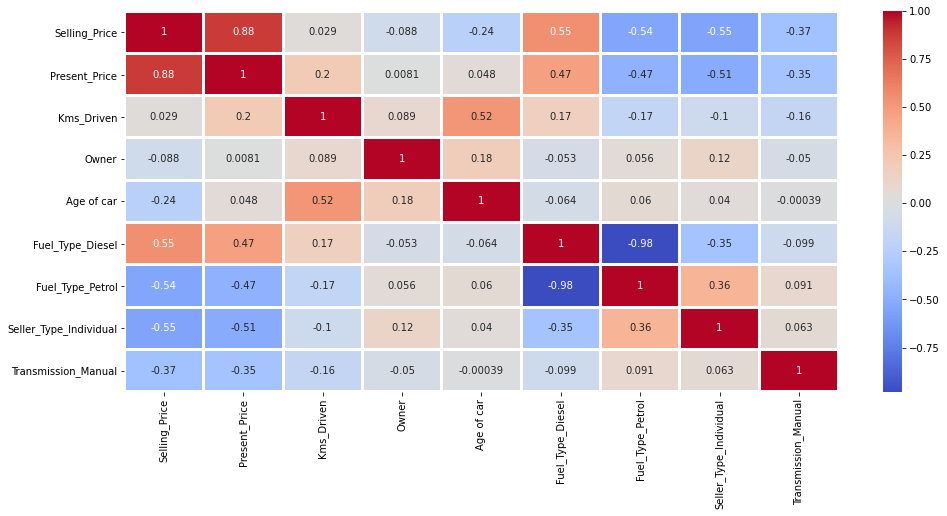

In [21]:
## lets check the correlation of variables with each other 
# correlation heatmap
plt.figure(figsize=(16,7))
ax = sns.heatmap(df.corr(), cmap = "coolwarm", annot= True, linewidth=2)

C:\Users\Prem\Anaconda3\envs\flight\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


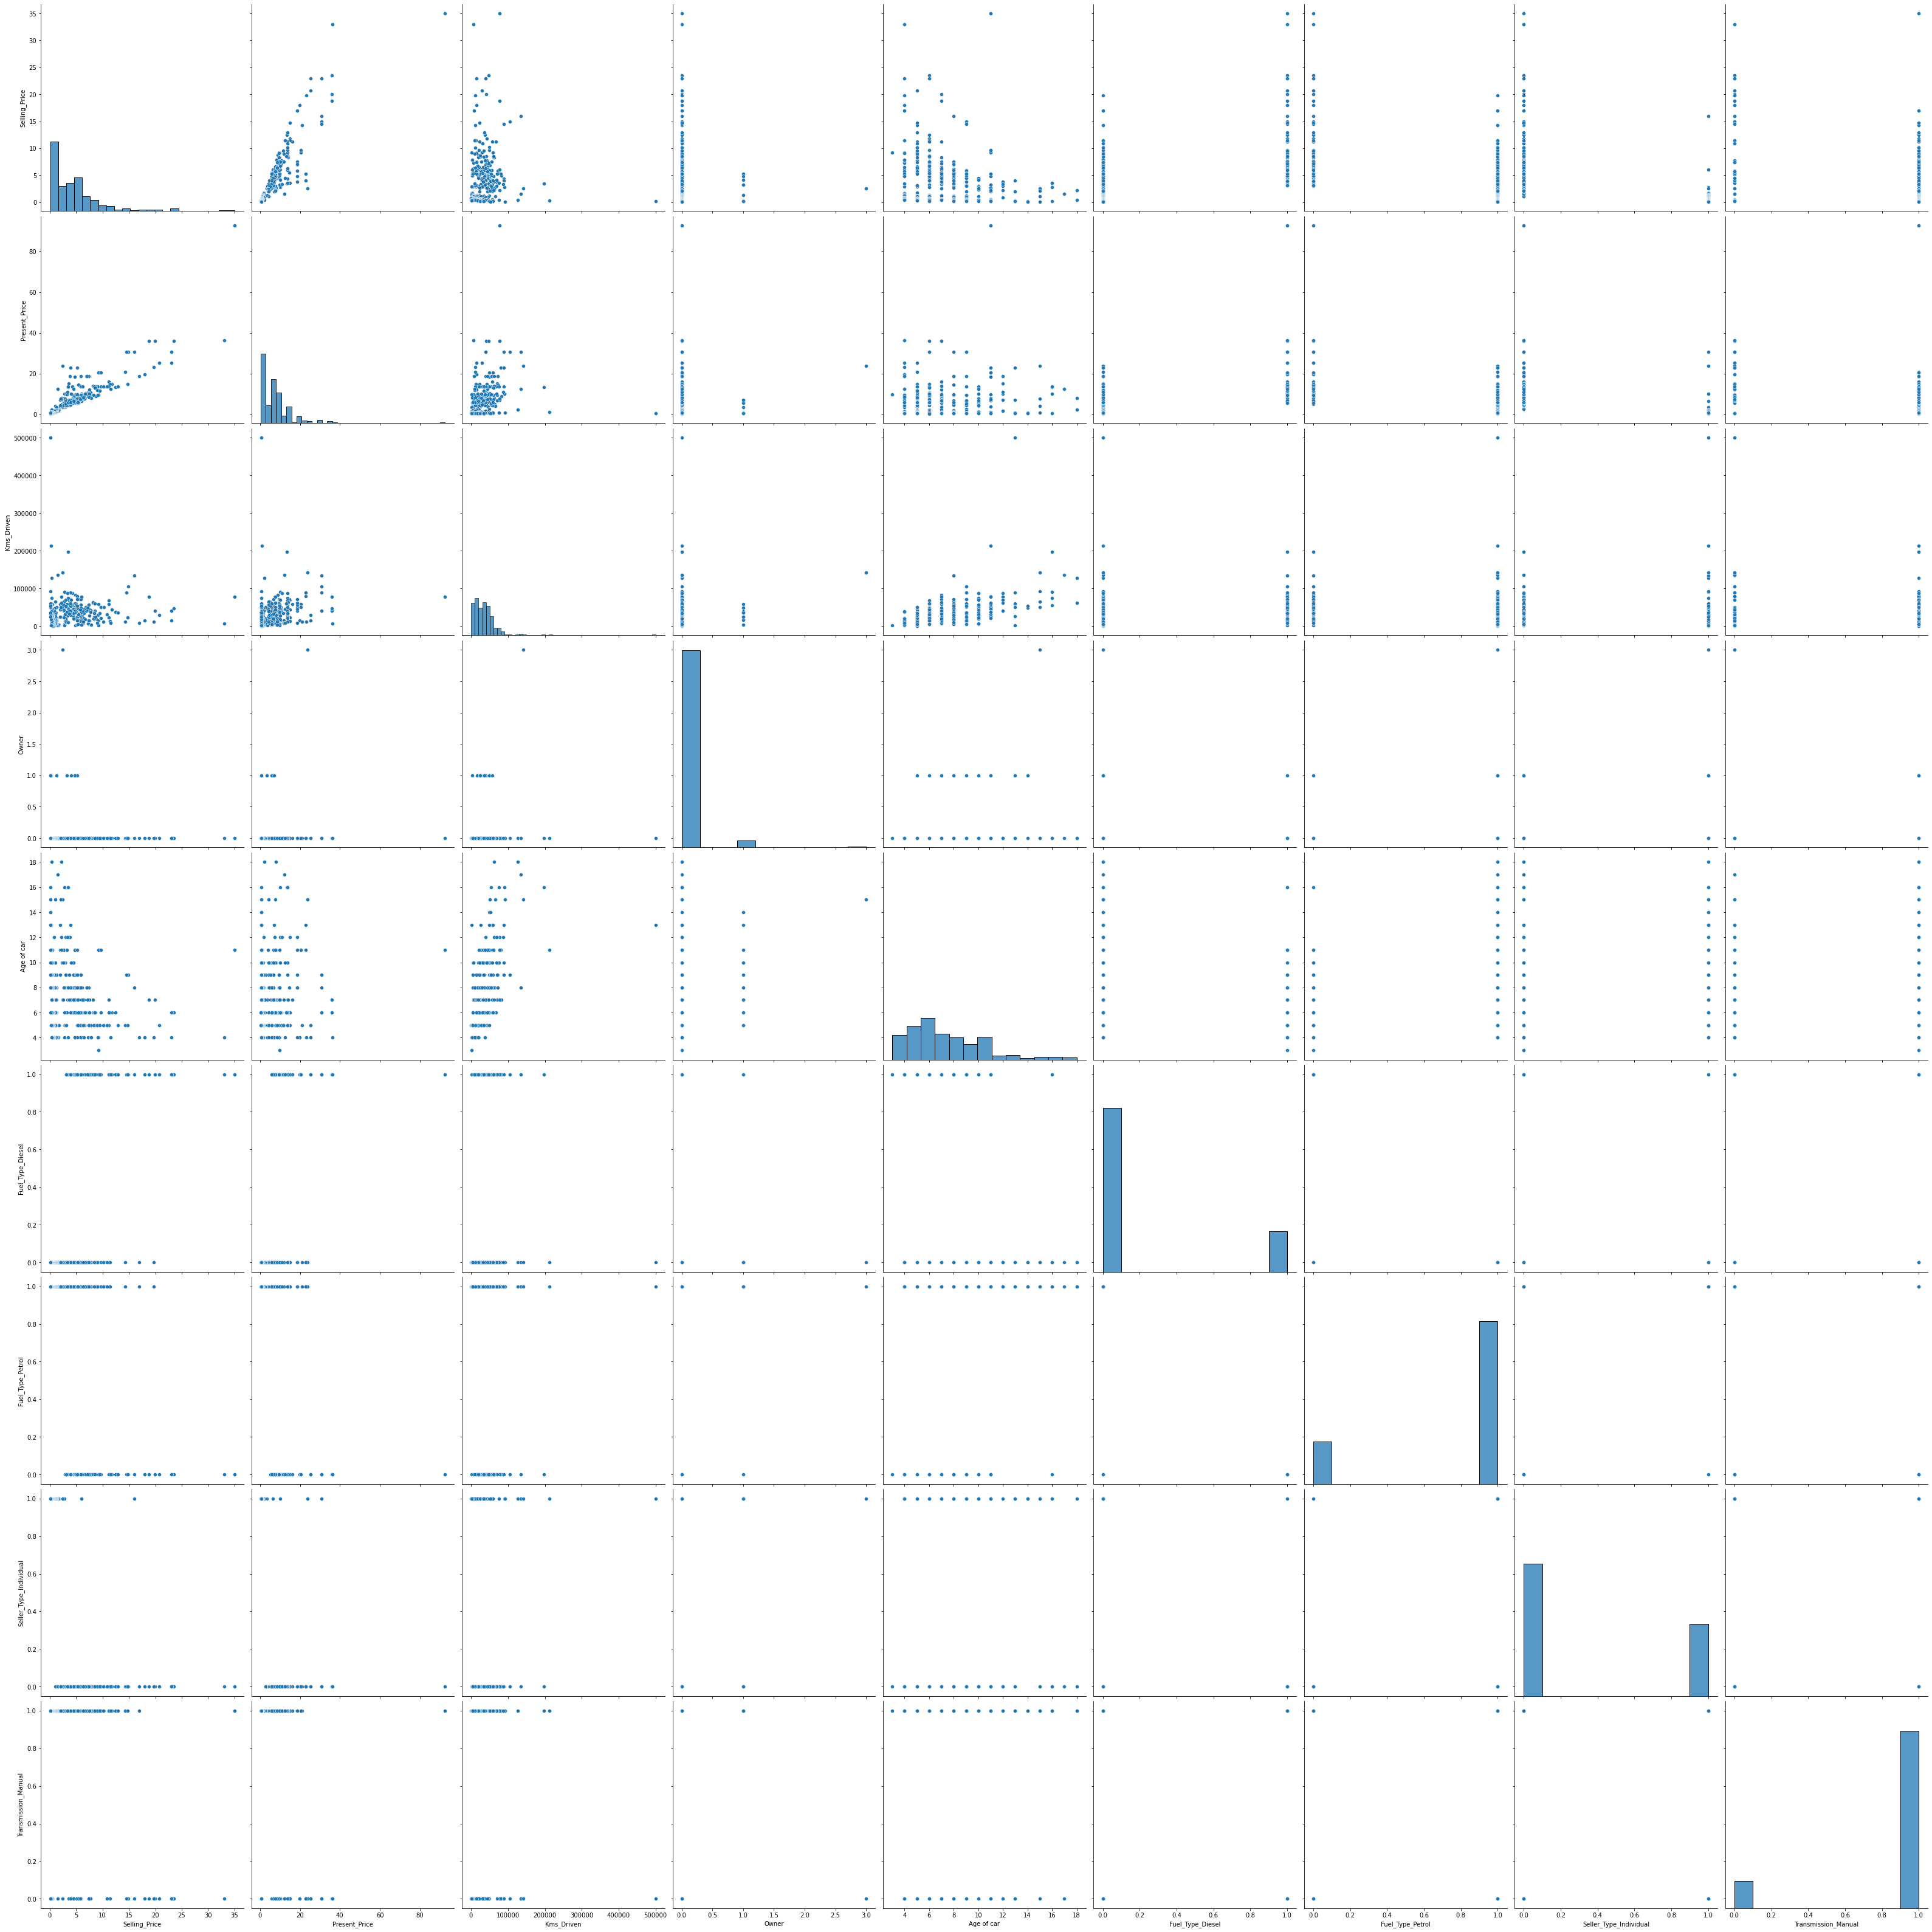

In [22]:
sns.pairplot(df ,  height=10 , size = 5 , markers="o" ) ## Multivariate analysis

## Feature selection

In [23]:
# correlation heatmap of higly correlated features with SalePrice
hig_corr = df.corr()
hig_corr_features = hig_corr.index[hig_corr["Selling_Price"] >= 0.45]
hig_corr_features

Index(['Selling_Price', 'Present_Price', 'Fuel_Type_Diesel'], dtype='object')

In [24]:
## splitting data into independent and dependent variable
X = df.drop("Selling_Price" , axis = 1)
y = df["Selling_Price"]

## Train test split

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [27]:
from sklearn.metrics import r2_score , mean_squared_error

## Linear regression

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error

lr = LinearRegression()
lr.fit(X_train , y_train)

## Predicting sales on test data
y_pred = lr.predict(X_test)

score = r2_score(y_test , y_pred)
mse = mean_squared_error(y_test , y_pred)

print(f"accuracy of model is  : {score}")
print(f"MSE of model is  : {mse}")

accuracy of model is  : 0.8517983059778264
MSE of model is  : 4.432128265667616


## Cross validation

In [29]:
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(estimator = lr, X = X_train,y = y_train, cv = 10)
print("Cross validation accuracy of Xgboost model = ", cross_validation)
print("\nCross validation mean accuracy of Xgboost model = ", cross_validation.mean())

Cross validation accuracy of Xgboost model =  [0.74152756 0.87519495 0.70229235 0.90520366 0.9069981  0.19045414
 0.63999252 0.90593096 0.89482268 0.82225851]

Cross validation mean accuracy of Xgboost model =  0.7584675448952883


In [30]:
import pickle #used to convert code to a file just integrate it and use
  
# Save the trained model as a pickle string.
pickle.dump(lr ,  open('model.pkl', 'wb'))
  
# Load the pickled model
model = pickle.load(open('model.pkl', 'rb'))
  
# Use the loaded pickled model to make predictions
model.predict(X_test)

array([ 7.58040009, -0.3627605 ,  4.31191003,  8.98463298, 14.04665091,
        4.89803855,  3.58761579,  1.38619893,  5.29991836,  4.62106109,
        2.42286099,  1.54852976,  5.07062421,  7.38717702,  8.6086708 ,
       13.4060192 ,  7.17894816,  4.277895  , -0.41524438,  2.25574225,
        4.94795881,  3.9771943 ,  6.31506796,  7.83735876, -1.80958855,
        1.84400579, -0.78578961,  0.7805503 ,  0.02712534,  6.89915356,
        3.90531626,  7.49276568,  0.68801837,  7.98584293,  3.56487209,
        1.71924821,  5.52591789,  7.08907897, -2.4345038 ,  9.03780556,
        9.19963667, 19.24628779,  4.43112145,  3.98990672,  6.77734378,
        9.77003063,  0.12924726,  1.6037066 ,  5.07902373,  7.43070321,
        7.85803117,  4.24368424,  4.84437324, 19.5767343 ,  1.66432568,
        1.23924673,  0.29440446,  2.15148086,  3.46799882,  0.89268384,
        3.54348215,  6.89957631,  2.71396621, 20.65820685,  4.33506014,
        5.53139061,  9.0583691 ,  7.04014227,  3.06307506,  2.74

In [31]:
model.predict([[7.60 , 77632, 0, 7 , 1,0,0,1 ]])

array([6.40134595])